In [164]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [165]:
housing = pd.DataFrame(pd.read_csv("Housing_data_final.csv"))

In [166]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,washingmachine,dtcenter,dtrec,dthospital,hotwater,ac,furnish,parking,security
0,6447368,100,1,2,1,1.238920,0.307354,0.578929,1,1,1,1,1
1,5710526,75,1,2,1,1.235416,0.131664,0.385726,1,1,1,1,2
2,5157895,58,1,2,1,1.135016,0.371314,0.775536,1,1,0,1,2
3,5157895,132,1,1,1,1.215055,0.499058,0.233979,1,1,2,1,0
4,4863158,78,1,1,1,0.508271,0.503129,1.064498,1,1,1,1,1


In [167]:
housing.shape

(545, 13)

In [168]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           545 non-null    int64  
 1   area            545 non-null    int64  
 2   bedrooms        545 non-null    int64  
 3   bathrooms       545 non-null    int64  
 4   washingmachine  545 non-null    int64  
 5   dtcenter        545 non-null    float64
 6   dtrec           545 non-null    float64
 7   dthospital      545 non-null    float64
 8   hotwater        545 non-null    int64  
 9   ac              545 non-null    int64  
 10  furnish         545 non-null    int64  
 11  parking         545 non-null    int64  
 12  security        545 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 55.5 KB


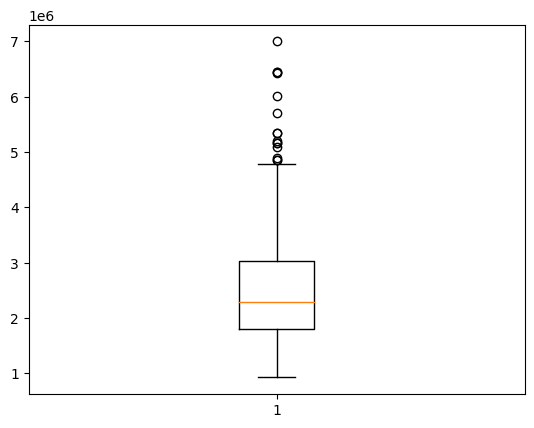

In [169]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

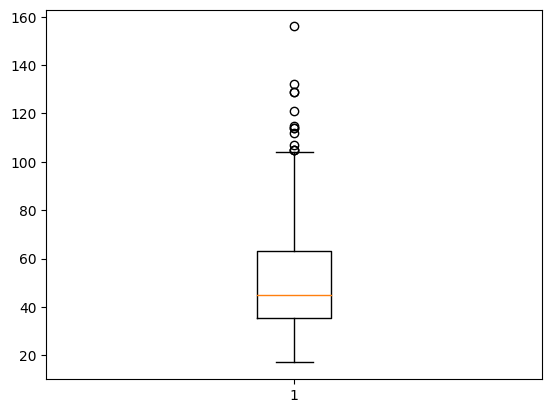

In [170]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

In [171]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [172]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [173]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'dtrec','dthospital', 'hotwater', 'ac', 'furnish', 'parking', 'security']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [174]:
y_train = df_train.pop('price')
X_train = df_train

In [175]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm  

In [176]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [177]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [178]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2, include_bias=True)
xp = polynomial_features.fit_transform(X_train)
xp.shape

model_2 = sm.OLS(y_train, xp).fit()



In [179]:
#Let's see the summary of our linear model\
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              692.9
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                   4.69e-235
Time:                        13:43:25   Log-Likelihood:                          369.21
No. Observations:                 361   AIC:                                     -714.4
Df Residuals:                     349   BIC:                                     -667.7
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [180]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     48.57
Date:                Fri, 24 Nov 2023   Prob (F-statistic):          1.57e-126
Time:                        13:43:26   Log-Likelihood:                 548.08
No. Observations:                 361   AIC:                            -920.2
Df Residuals:                     273   BIC:                            -577.9
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3092      0.359      0.862      0.3

In [181]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [182]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'dtrec','dthospital', 'hotwater', 'ac', 'furnish', 'parking', 'security']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [183]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [184]:
y_test = df_test.pop('price')
X_test = df_test

In [185]:
# Adding constant variable to test dataframe
#X_test = sm.add_constant(X_test)

In [186]:
# Now let's use our model to make predictions.

In [187]:
xtt = polynomial_features.fit_transform(X_test)
y_pred_2 = model_2.predict(xtt) 

In [188]:
# Making predictions
y_pred = lm.predict(X_test)

In [189]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8249875290189583

In [190]:
r2_score(y_test,y_pred_2)

0.8778262503397734

Text(0, 0.5, 'y_pred')

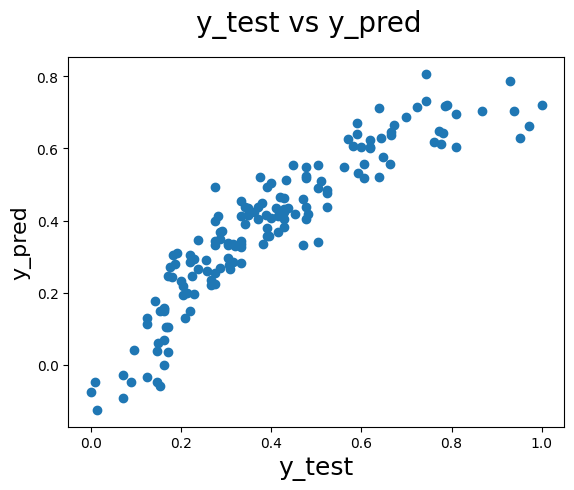

In [191]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred_2')

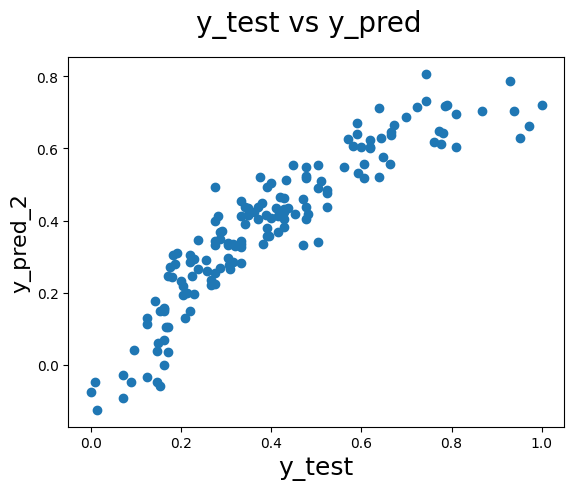

In [192]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_2', fontsize=16)                          # Y-label